#**Parameter Analysis for the ARIMA model**

## Import the library


In [1]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


## Read dataset

In [1]:
from pmdarima import auto_arima
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

## Fit auto_arima function to AirPassengers dataset


In [2]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## To print the summary


In [6]:
stepwise_fit = auto_arima(df.loc[0:49, 'Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m =3,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=318.510, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=291.137, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=316.713, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=295.392, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=285.169, Time=0.13 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=317.874, Time=0.09 sec
 ARIMA(2,0,0)(2,1,0)[3] intercept   : AIC=287.139, Time=0.16 sec
 ARIMA(1,0,1)(2,1,0)[3] intercept   : AIC=287.152, Time=0.16 sec
 ARIMA(0,0,1)(2,1,0)[3] intercept   : AIC=301.385, Time=0.14 sec
 ARIMA(2,0,1)(2,1,0)[3] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,0,0)(2,1,0)[3]             : AIC=283.204, Time=0.08 sec
 A

In [7]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   51
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 3)   Log Likelihood                -137.602
Date:                           Wed, 21 Aug 2024   AIC                            283.204
Time:                                   08:41:28   BIC                            290.689
Sample:                                        0   HQIC                           286.032
                                            - 51                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7882      0.096      8.234      0.000       0.601       0.976
ar.S.L3       -0.5367      0.159     -3.366      0.001      -0.849      -0.224
ar.S.L6       -0.4119      0.210     -1.964      0.050      -0.823      -0.001
sigma2        17.3775      2.877      6.039      0.000      11.738      23.017
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.37
Prob(Q):                              0.94   Prob(JB):                         0.19
Heteroskedasticity (H):               3.08   Skew:                             0.41
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [8]:
trainx = df.iloc[:len(df)-12]
testx = df.iloc[len(df)-12:]

## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [10]:
model = SARIMAX(trainx['Vehicles'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                48108
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood             -140812.138
Date:                            Wed, 21 Aug 2024   AIC                         281634.277
Time:                                    08:43:19   BIC                         281678.181
Sample:                                         0   HQIC                        281648.055
                                          - 48108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1622      0.001   -124.158      0.000      -0.165      -0.160
ar.S.L12      -0.1870      0.003    -65.329      0.000      -0.193      -0.181
ar.S.L24       0.2432      0.002    118.167      0.000       0.239       0.247
ma.S.L12      -0.9815      0.001  -1133.662      0.000      -0.983      -0.980
sigma2        20.4273      0.025    830.140      0.000      20.379      20.476
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):           6682102.17
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        60.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [11]:
start = len(trainx)
end = len(trainx) + len(testx) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")


## plot predictions and actual values



<Axes: >

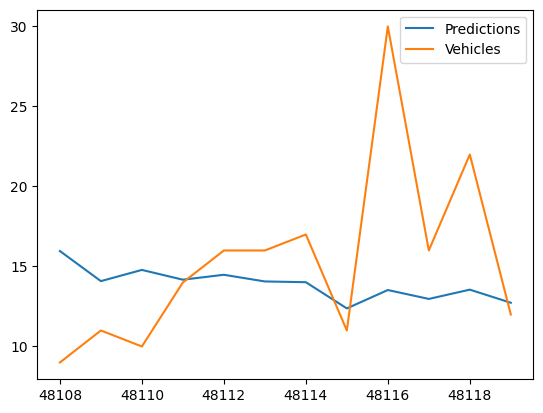

In [13]:
predictions.plot(legend = True)
testx['Vehicles'].plot(legend = True)


## Evaluate the model using MSE and RMSE

In [15]:
rmse(testx['Vehicles'], predictions)

# Calculate mean squared error
mean_squared_error(testx['Vehicles'], predictions)


37.51878654351828

#**Well Done :)**